## Event Driven Simulation 

### Scheduling CoMP

In [1]:
import edsmodified as eds
import simpy
import numpy as np
import pandas as pd
import scipy
SCHEDULE_T=2
import matplotlib.pyplot as plt
import show as sh

In [2]:
env=simpy.Environment()
#env = simpy.rt.RealtimeEnvironment(factor=1/10)

ue_list=np.array([])
ue_list2=np.array([])
#define UEs

    
max_prb=50
thr=6
cluster=[19,20]

ue_nr=100

x=np.append(np.ones(ue_nr)*19,np.ones(ue_nr)*20)
y=np.append(np.ones(ue_nr)*20,np.ones(ue_nr)*19)
sinr=np.random.randint(-5,15,ue_nr*2)
sinr2=np.random.randint(0,18,ue_nr*2)

rt_nrt=np.array([])
rt_nrt=np.append(rt_nrt,np.ones(ue_nr*2)*0)

df=pd.DataFrame()
df['PCI Serving']=x
df['PCI Coord']=y
df['JT_1 SINR [lin]']=sinr
df['JT_2 SINR [lin]']=sinr2
df['usage']=rt_nrt
df['id']=np.arange(0,ue_nr*2)
   
df['PCI Serving']=df['PCI Serving'].astype('int')
df['PCI Coord']=df['PCI Coord'].astype('int')

df['JT_1 SINR [lin]']=df['JT_1 SINR [lin]'].astype('int')
df['JT_2 SINR [lin]']=df['JT_2 SINR [lin]'].astype('int')

In [3]:
df2=df

In [4]:
ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,160))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS\edsmodified.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\edsmodified.py:203: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


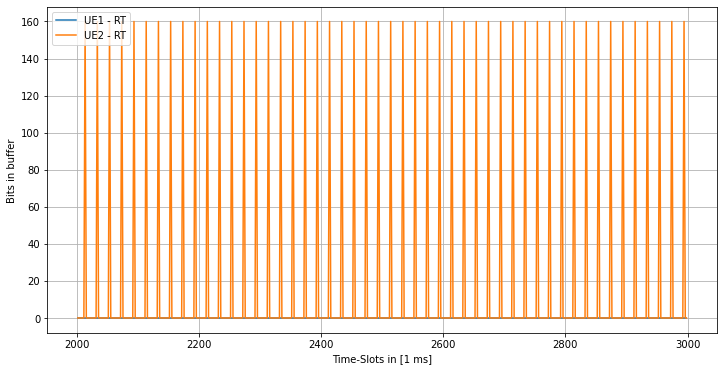

In [5]:
plt.figure(figsize=(12,6))
plt.plot(list(ue_all[20].mon.keys())[1000:3000],list(ue_all[20].mon.values())[1000:3000],label='UE1 - RT')
plt.plot(list(ue_all[30].mon.keys())[1000:3000],list(ue_all[30].mon.values())[1000:3000],label='UE2 - RT')
#plt.plot(list(ue_all[47].mon.keys()),list(ue_all[47].mon.values()),label='UE3 - RT')
#plt.plot(list(ue_list[120].mon.keys())[1000:3000],list(ue_list[120].mon.values())[1000:3000],label='UE4')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')

In [6]:
df=eds.ue_to_df(ue_all[0:49])

No handles with labels found to put in legend.


0.0
0
0.0
0
0.07251202847728955
1
0.1842681023560777
1
0.0
0
-0.0004550826310456557
0
0.08919029216305496
1
0.33401275818862874
1
0.0
0
0.0
0
0.09218526118255355
1
0.0
0
0.0
0
0.0
0
0.0
0
-3.084451541957023e-05
0
0.23691289622498335
1
-2.5942631565190055e-05
0
-0.015741020276238693
0
-0.00065679011209685
0
-0.0007168565050230669
0
-0.0028628048253542815
0
-0.00030164531216181345
0
0.22549741438724347
1
0.0
0
0.0
0
0.0
0
0.08726353406318665
1
0.13524533851203557
1
0.07949375368243583
1
0.0
0
0.15980882481012593
1
-0.0004579186347997144
0
0.10032032954327974
1
0.0
0
0.14664492453546618
1
0.0
0
-0.0023006696013849748
0
0.25560770790917786
1
0.0
0
0.05713186586233654
1
0.0
0
0.0
0
0.07119773900552406
1
0.0
0
0.1362952550796992
1
-0.00041427917434333494
0
0.0
0
-0.0003265694652476725
0
0.09305610820553589
1
-0.0003192112498218158
0
-6.608666486274117e-05
0
-0.00022970782693754188
0
-0.0002261239007927962
0
0.0
0
-0.004153999615486015
0
0.0
0
0.13152892895884616
1
0.0
0
-9.467601022050687e-0

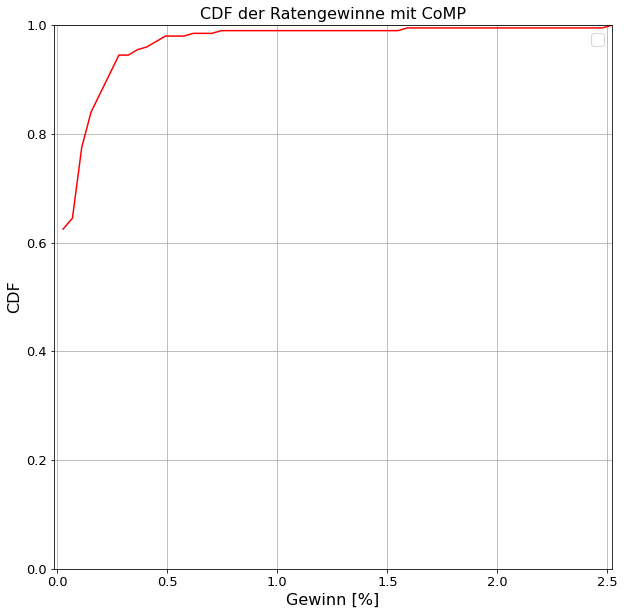

In [7]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(((i.mR2/i.mR)-1)*100)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)

sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)

In [8]:
print('comp prb perc',prb_number_comp/(prb_number_normal+prb_number_comp))
print('comp user perc',len(ue_comp)/len(ue_all))

comp prb perc 0.6
comp user perc 0.375


In [14]:
df=df2
env=simpy.Environment()

In [15]:
ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,16000))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS\edsmodified.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\edsmodified.py:203: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


No handles with labels found to put in legend.


-46.6901955346393
0
-45.87964172537984
0
186.81737031602137
1
181.5151948118654
1
-46.66390360219908
0
-45.99650601134243
0
22.336060950383384
1
50.86629158840674
1
-48.57466904218233
0
-46.6657401435666
0
33.594604303048705
1
-48.57433545166946
0
-47.36679654370279
0
-47.40051283447466
0
-45.87152762084574
0
-46.66378299202795
0
91.06384001808769
1
-47.36644245605459
0
-26.472021317091844
0
-47.99750783159963
0
-47.27033248743873
0
-49.330799135413415
0
-46.95446544964273
0
177.01432317598122
1
-46.67070527660759
0
-45.900930319916924
0
-48.56962210113364
0
146.7964722389532
1
70.43604496142181
1
28.07806715071852
1
-47.89090468358796
0
134.81424697781358
1
-48.23668038743008
0
70.83890701549917
1
-49.33633430842259
0
108.99418268317818
1
-48.234582173557264
0
-46.95536208704824
0
219.14070819810058
1
-47.47812601667536
0
133.14207522627333
1
-47.269803635705344
0
-47.366796488865184
0
205.32668380657572
1
-47.535714610144694
0
122.79098062118364
1
-46.663806750432315
0
-48.2356601470

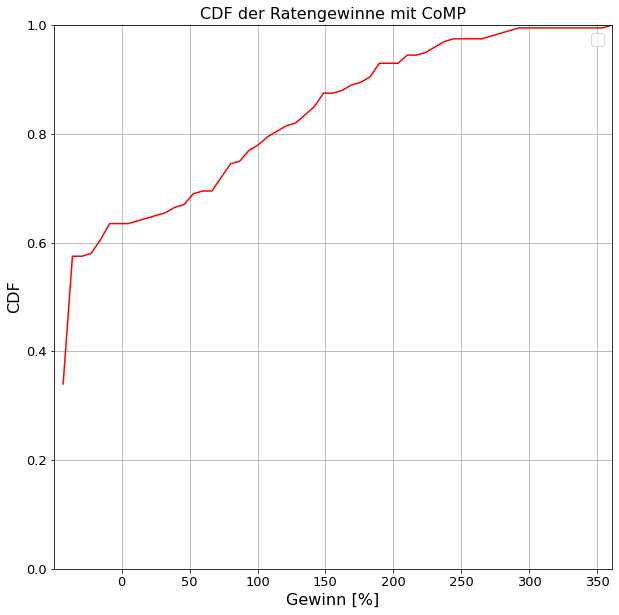

In [16]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(((i.mR2/i.mR)-1)*100)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)


sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)

In [17]:
df=df2
env=simpy.Environment()
max_prb=20


ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,1600))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS\edsmodified.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\edsmodified.py:203: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


No handles with labels found to put in legend.


-45.07715980472673
0
-45.87697664758191
0
-44.25552264606453
1
25.96853261046426
1
-46.36855324418331
0
-46.62112645829954
0
-77.13818120079634
1
-67.49262013780462
1
-48.18739072424197
0
-46.66484957239228
0
-73.70598669904875
1
-48.53945277691805
0
-46.391790147256195
0
-47.01109191740026
0
-45.880962870686126
0
-46.489642816590184
0
-65.62600162412448
1
-45.30514486097166
0
-55.46306857736085
0
-46.806873685772366
0
-45.8250226710465
0
-46.19991951677813
0
-45.97039864768875
0
24.522401349522085
1
-47.233957678821625
0
-45.88881316186841
0
-48.54187820740496
0
-50.24964268862484
1
-67.4812836008181
1
-46.510043292584335
1
-48.353209688072866
0
-38.494443391918395
1
-45.15955987093562
0
-66.28839733967706
1
-46.37786920296865
0
-57.98959341392491
1
-47.93587662923016
0
-45.85277662665025
0
43.482722383810966
1
-45.85006568624218
0
-52.66442068537722
1
-47.72866715469962
0
-47.51413854124608
0
26.371912697475143
1
-0.13673961162763426
0
-8.585962345176835
1
-46.52690406078048
0
-48.41

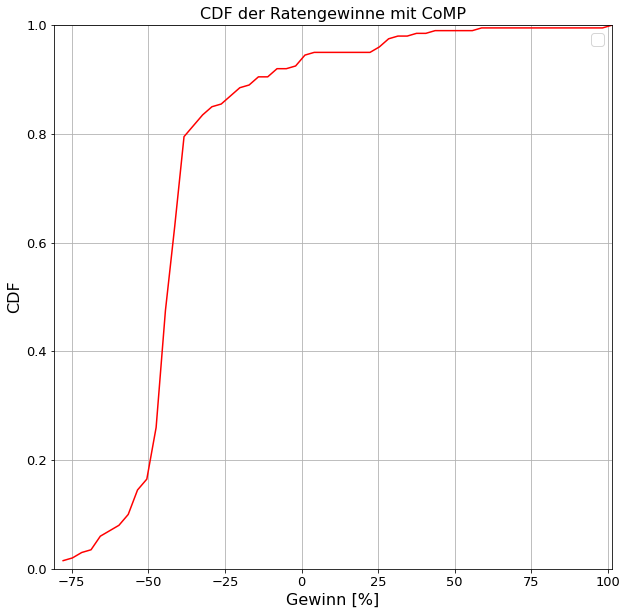

In [18]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(((i.mR2/i.mR)-1)*100)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)

sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)